# .Credit Card Approval Prediction

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Background & Business Problem <a name="introduction"></a>

**Background :** There are close 50 Million Credit cards in circulation in INDIA and the total annual spent on the credit cards has touched 6.07 lakh crore in the FY 2018-19 according Economic Times https://economictimes.indiatimes.com/industry/banking/finance/banking/credit-card-usage-rides-on-digital-push-grows-27/articleshow/70580357.cms?from=mdr

The banks issue More than a Million cards everymonth. This makes the manual scrutiny of the application a tedious job.

**Business Problem :** Banking industries millions of applications for credit card request. Going through each request manually can be very time consuming, also prone to human errors. However, if we can use the historical data to build a model which can shortlist the candidates for approval, it would add as an extension to the human cognitive strengths and the applications can be filtered with authenticated confidence levels.

**This project aims to build a Model solve the above business Problem.** 

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decision are:
* The Credit Score, Debt Ratio, Experience, Age

Following data sources will be needed to extract/generate the required information:

- [**Data**: Preprocessing a real world data set from UIC](#part1): http://archive.ics.uci.edu/ml/datasets/credit+approval

#### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import t
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, f1_score, recall_score
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import math
from scipy.stats import zscore 
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
print('Libraries imported.')

Libraries imported.


#### Read in the dataset

In [2]:
# Read in the data 
df = pd.read_csv(r"C:\Users\Mohan\Python\Projects\Classification\Credit Card Approval Prediction\data\cc_data.csv")

#### Understanding the dataset

In [3]:
display(df.shape)
display(df.info())
display(df.head())
display(df.describe().T)

(690, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Gender            690 non-null object
Age               690 non-null object
Debt              690 non-null float64
Married           690 non-null object
BankCustomer      690 non-null object
EducationLevel    690 non-null object
Ethnicity         690 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null object
Employed          690 non-null object
CreditScore       690 non-null int64
DriversLicense    690 non-null object
Citizen           690 non-null object
ZipCode           690 non-null object
Income            690 non-null int64
Approved          690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


None

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


,count,mean,std,min,25%,50%,75%,max
Debt,690.0,4.758725,4.978163,0.0,1.000,2.75,7.2075,28.0
YearsEmployed,690.0,2.223406,3.346513,0.0,0.165,1.00,2.6250,28.5
CreditScore,690.0,2.400000,4.862940,0.0,0.000,0.00,3.0000,67.0
Income,690.0,1017.385507,5210.102598,0.0,0.000,5.00,395.5000,100000.0


#### Change the column names 

In [4]:
df.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

In [5]:
df.columns = ['Gender', 'Age', 'Debt_Ratio', 'Marital_Status', 'Bank_Customer', 'Education_Level',
       'Ethnicity', 'Years_Employed', 'Prior_Default', 'Experience', 'Credit_Score',
       'Driving_License', 'Citizen', 'Zip_Code', 'Income', 'Approved']
df.head()

,Gender,Age,Debt_Ratio,Marital_Status,Bank_Customer,Education_Level,Ethnicity,Years_Employed,Prior_Default,Experience,Credit_Score,Driving_License,Citizen,Zip_Code,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


#### Converting the 'Age' Data Type to Numeric 

In [6]:
# Replace "?" with NaN
df.replace('?', np.NaN, inplace = True)
# Convert Age to numeric
df["Age"] = pd.to_numeric(df["Age"])

In [7]:
#Missing Values
df.isnull().sum().to_frame('nulls').T

,Gender,Age,Debt_Ratio,Marital_Status,Bank_Customer,Education_Level,Ethnicity,Years_Employed,Prior_Default,Experience,Credit_Score,Driving_License,Citizen,Zip_Code,Income,Approved
nulls,12,12,0,6,6,9,9,0,0,0,0,0,0,13,0,0


#### Understanding the Numerical and Ctaegorical Columns

In [8]:
#First we will find numerical columns and delete from the whole set to get categorical columns 
num_cols = df._get_numeric_data().columns
categorical_columns=list(set(df.columns)-set(num_cols))
print("categorical_columns are",categorical_columns)

categorical_columns are ['Education_Level', 'Experience', 'Bank_Customer', 'Prior_Default', 'Marital_Status', 'Approved', 'Ethnicity', 'Gender', 'Citizen', 'Driving_License', 'Zip_Code']


In [9]:
num_cols

Index(['Age', 'Debt_Ratio', 'Years_Employed', 'Credit_Score', 'Income'], dtype='object')

#### Imputing the Numerical Columns with Mean Values

In [10]:
# Imputing missing values for numerical columns with mean value
df.fillna(df.mean(), inplace=True)

In [11]:
#Missing Values
df.isnull().sum().to_frame('nulls').T

,Gender,Age,Debt_Ratio,Marital_Status,Bank_Customer,Education_Level,Ethnicity,Years_Employed,Prior_Default,Experience,Credit_Score,Driving_License,Citizen,Zip_Code,Income,Approved
nulls,12,0,0,6,6,9,9,0,0,0,0,0,0,13,0,0


#### Imputing the categorical columns with Mode of that column

In [12]:
def imputeWithMode(data):
    """ 
    Going through each columns and checking the type is object
    if it is object, impute it with most frequent value
    """
    for col in data:
        if data[col].dtypes == 'object':
            data[col] = data[col].fillna(data[col].mode().iloc[0])
imputeWithMode(df)

#### Understanding the Missing Values after Imputing

In [13]:
#Missing Values
df.isnull().sum().to_frame('nulls').T

,Gender,Age,Debt_Ratio,Marital_Status,Bank_Customer,Education_Level,Ethnicity,Years_Employed,Prior_Default,Experience,Credit_Score,Driving_License,Citizen,Zip_Code,Income,Approved
nulls,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Using LabelEncoder Function to encode the categorical Columns

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# # Looping for each object type column
#Using label encoder to convert into numeric types
for col in df:
    if df[col].dtypes=='object':
        df[col]=le.fit_transform(df[col])

In [15]:
df.head(20)

,Gender,Age,Debt_Ratio,Marital_Status,Bank_Customer,Education_Level,Ethnicity,Years_Employed,Prior_Default,Experience,Credit_Score,Driving_License,Citizen,Zip_Code,Income,Approved
0,1,30.83,0.000,1,0,12,7,1.250,1,1,1,0,0,42,0,0
1,0,58.67,4.460,1,0,10,3,3.040,1,1,6,0,0,118,560,0
2,0,24.50,0.500,1,0,10,3,1.500,1,0,0,0,0,74,824,0
3,1,27.83,1.540,1,0,12,7,3.750,1,1,5,1,0,1,3,0
4,1,20.17,5.625,1,0,12,7,1.710,1,0,0,0,2,8,0,0
5,1,32.08,4.000,1,0,9,7,2.500,1,0,0,1,0,96,0,0
6,1,33.17,1.040,1,0,11,3,6.500,1,0,0,1,0,25,31285,0
7,0,22.92,11.585,1,0,2,7,0.040,1,0,0,0,0,159,1349,0
8,1,54.42,0.500,2,2,8,3,3.960,1,0,0,0,0,34,314,0
9,1,42.50,4.915,2,2,12,7,3.165,1,0,0,1,0,140,1442,0


In [16]:
df.tail(20)

,Gender,Age,Debt_Ratio,Marital_Status,Bank_Customer,Education_Level,Ethnicity,Years_Employed,Prior_Default,Experience,Credit_Score,Driving_License,Citizen,Zip_Code,Income,Approved
670,1,47.17,5.835,1,0,12,7,5.500,0,0,0,0,0,129,150,1
671,1,25.83,12.835,1,0,2,7,0.500,0,0,0,0,0,0,2,1
672,0,50.25,0.835,1,0,0,7,0.500,0,0,0,1,0,61,117,1
673,1,29.50,2.000,2,2,4,3,2.000,0,0,0,0,0,66,17,1
674,0,37.33,2.500,1,0,6,3,0.210,0,0,0,0,0,67,246,1
675,0,41.58,1.040,1,0,0,7,0.665,0,0,0,0,0,61,237,1
676,0,30.58,10.665,1,0,10,3,0.085,0,1,12,1,0,11,3,1
677,1,19.42,7.250,1,0,9,7,0.040,0,1,1,0,0,1,1,1
678,0,17.92,10.210,1,0,5,2,0.000,0,0,0,0,0,0,50,1
679,0,20.08,1.250,1,0,1,7,0.000,0,0,0,0,0,0,0,1


In [17]:
df['Approved'].unique()

array([0, 1], dtype=int64)

In [18]:
# Removing the feature which are not important and converting to NumPy array
df = df.drop(['Driving_License', 'Zip_Code'], axis=1)

In [19]:
# Dropping the Rows which are having Marital Stus as 0
df.drop(df[df['Marital_Status'] == 0].index, inplace = True) 

In [20]:
# Dropping the Rows which are having Marital Stus as 0
df.drop(df[df['Citizen'] == 1].index, inplace = True) 

In [21]:
df

,Gender,Age,Debt_Ratio,Marital_Status,Bank_Customer,Education_Level,Ethnicity,Years_Employed,Prior_Default,Experience,Credit_Score,Citizen,Income,Approved
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,0,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,2,2,4,3,1.25,0,0,0,0,0,1
686,0,22.67,0.750,1,0,1,7,2.00,0,1,2,0,394,1
687,0,25.25,13.500,2,2,5,2,2.00,0,1,1,0,1,1
688,1,17.92,0.205,1,0,0,7,0.04,0,0,0,0,750,1


In [22]:
df['Marital_Status'].unique()

array([1, 2], dtype=int64)

In [23]:
df['Marital_Status'].dtypes

dtype('int32')

In [24]:
df['Marital_Status'] = df['Marital_Status'].fillna(df["Marital_Status"].mode().iloc[0])

In [25]:
df['Marital_Status'].unique()

array([1, 2], dtype=int64)

## EDA - Exploratory Data Analysis

In this section, We shall dive deep into the Data to understand and make a data story, which would give market analysis and market segmentation as well. 

### Distribution Analysis of Target Variable

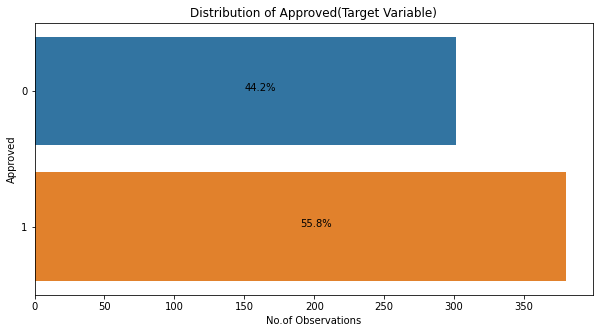

In [26]:
plt.figure(figsize=(10,5))

ax = sns.countplot(y=df["Approved"], data=df)
plt.title('Distribution of Approved(Target Variable)')
plt.xlabel('No.of Observations')

total = len(df["Approved"])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

**Observation :** 

In the Dataset 55.5% are true cases and 44.5% are false cases. The Datset is nearly balanced.

In [27]:
df.sample(3)

,Gender,Age,Debt_Ratio,Marital_Status,Bank_Customer,Education_Level,Ethnicity,Years_Employed,Prior_Default,Experience,Credit_Score,Citizen,Income,Approved
434,1,58.58,2.71,1,0,1,7,2.415,0,0,0,0,0,1
324,1,33.67,1.25,1,0,12,7,1.165,0,0,0,0,0,1
376,1,28.67,14.50,1,0,3,7,0.125,0,0,0,0,286,1


In [28]:
display(df['Education_Level'].unique())
display(df['Ethnicity'].unique())
display(df['Prior_Default'].unique())
display(df['Experience'].unique())
display(df['Credit_Score'].unique())
display(df['Citizen'].unique())

array([12, 10,  9, 11,  2,  8,  1,  3, 13,  6,  4,  0,  5,  7],
      dtype=int64)

array([7, 3, 0, 2, 4, 8, 6, 1, 5], dtype=int64)

array([1, 0], dtype=int64)

array([1, 0], dtype=int64)

array([ 1,  6,  0,  5,  7, 10,  3, 17,  2,  9,  8, 15, 11, 12, 40, 23,  4,
       20, 67, 14, 16, 13, 19], dtype=int64)

array([0, 2], dtype=int64)

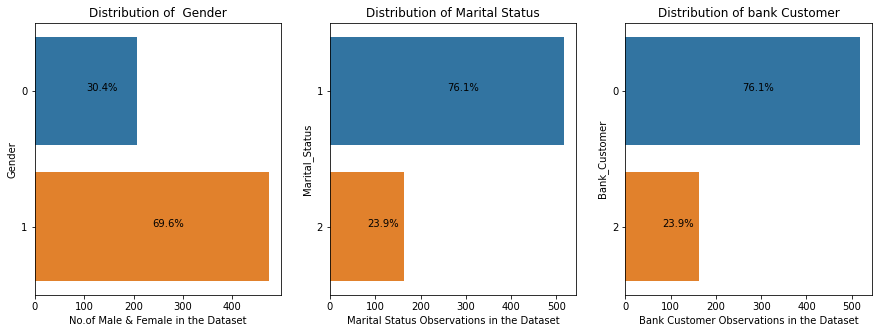

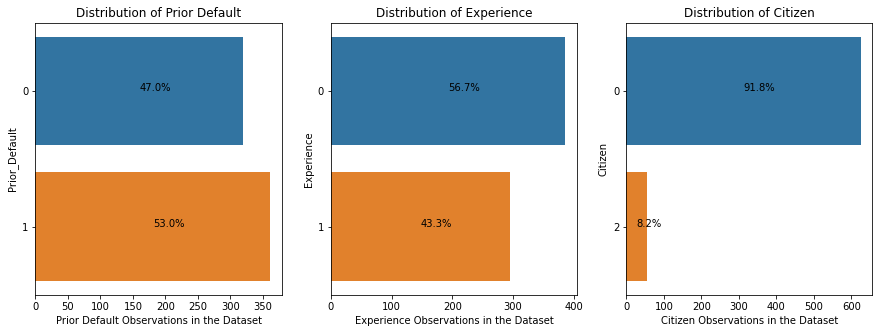

In [29]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
ax = sns.countplot(y=df['Gender'], data=df)
plt.title('Distribution of  Gender')
plt.xlabel('No.of Male & Female in the Dataset')

total = len(df['Gender'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.subplot(1,3,2)
ax = sns.countplot(y=df['Marital_Status'], data=df)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status Observations in the Dataset')

total = len(df['Marital_Status'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.subplot(1,3,3)
ax = sns.countplot(y=df['Bank_Customer'], data=df)
plt.title('Distribution of bank Customer')
plt.xlabel('Bank Customer Observations in the Dataset')

total = len(df['Bank_Customer'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
ax = sns.countplot(y=df['Prior_Default'], data=df)
plt.title('Distribution of Prior Default')
plt.xlabel('Prior Default Observations in the Dataset')

total = len(df['Prior_Default'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.subplot(1,3,2)
ax = sns.countplot(y=df['Experience'], data=df)
plt.title('Distribution of Experience')
plt.xlabel('Experience Observations in the Dataset')

total = len(df['Experience'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.subplot(1,3,3)
ax = sns.countplot(y=df['Citizen'], data=df)
plt.title('Distribution of Citizen')
plt.xlabel('Citizen Observations in the Dataset')
total = len(df['Citizen'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()

In [30]:
display(df['Education_Level'].unique())
display(df['Ethnicity'].unique())
display(df['Prior_Default'].unique())
display(df['Experience'].unique())
display(df['Credit_Score'].unique())
display(df['Citizen'].unique())

array([12, 10,  9, 11,  2,  8,  1,  3, 13,  6,  4,  0,  5,  7],
      dtype=int64)

array([7, 3, 0, 2, 4, 8, 6, 1, 5], dtype=int64)

array([1, 0], dtype=int64)

array([1, 0], dtype=int64)

array([ 1,  6,  0,  5,  7, 10,  3, 17,  2,  9,  8, 15, 11, 12, 40, 23,  4,
       20, 67, 14, 16, 13, 19], dtype=int64)

array([0, 2], dtype=int64)

In [31]:
df.shape

(681, 14)

C:\Users\Mohan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:62: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()
C:\Users\Mohan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:62: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


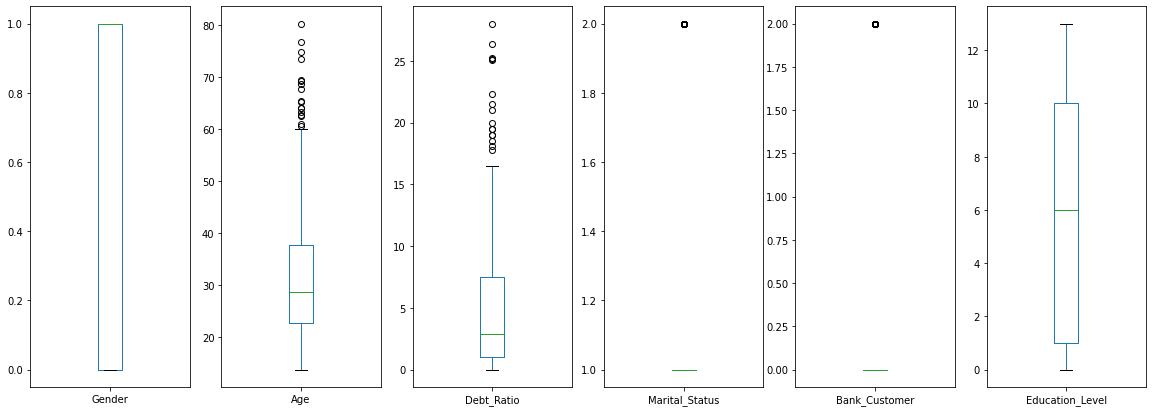

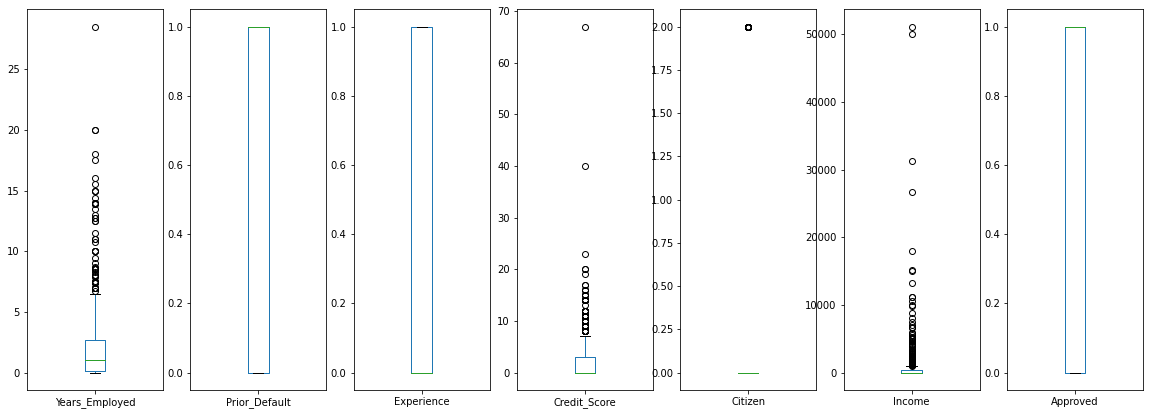

In [32]:
# plot box plots for independent feature(features with numerical values) to check the outliers
fig, ax = plt.subplots(figsize=(20,7))
df.iloc[:,0:6].plot(kind="box",subplots = True, ax=ax)

fig, ax = plt.subplots(figsize=(20,7))
df.iloc[:,7:14].plot(kind="box",subplots = True, ax=ax)

plt.show()

C:\Users\Mohan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Mohan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Mohan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Mohan\Anaconda3\lib\site-packages\pandas\plotting\_matpl

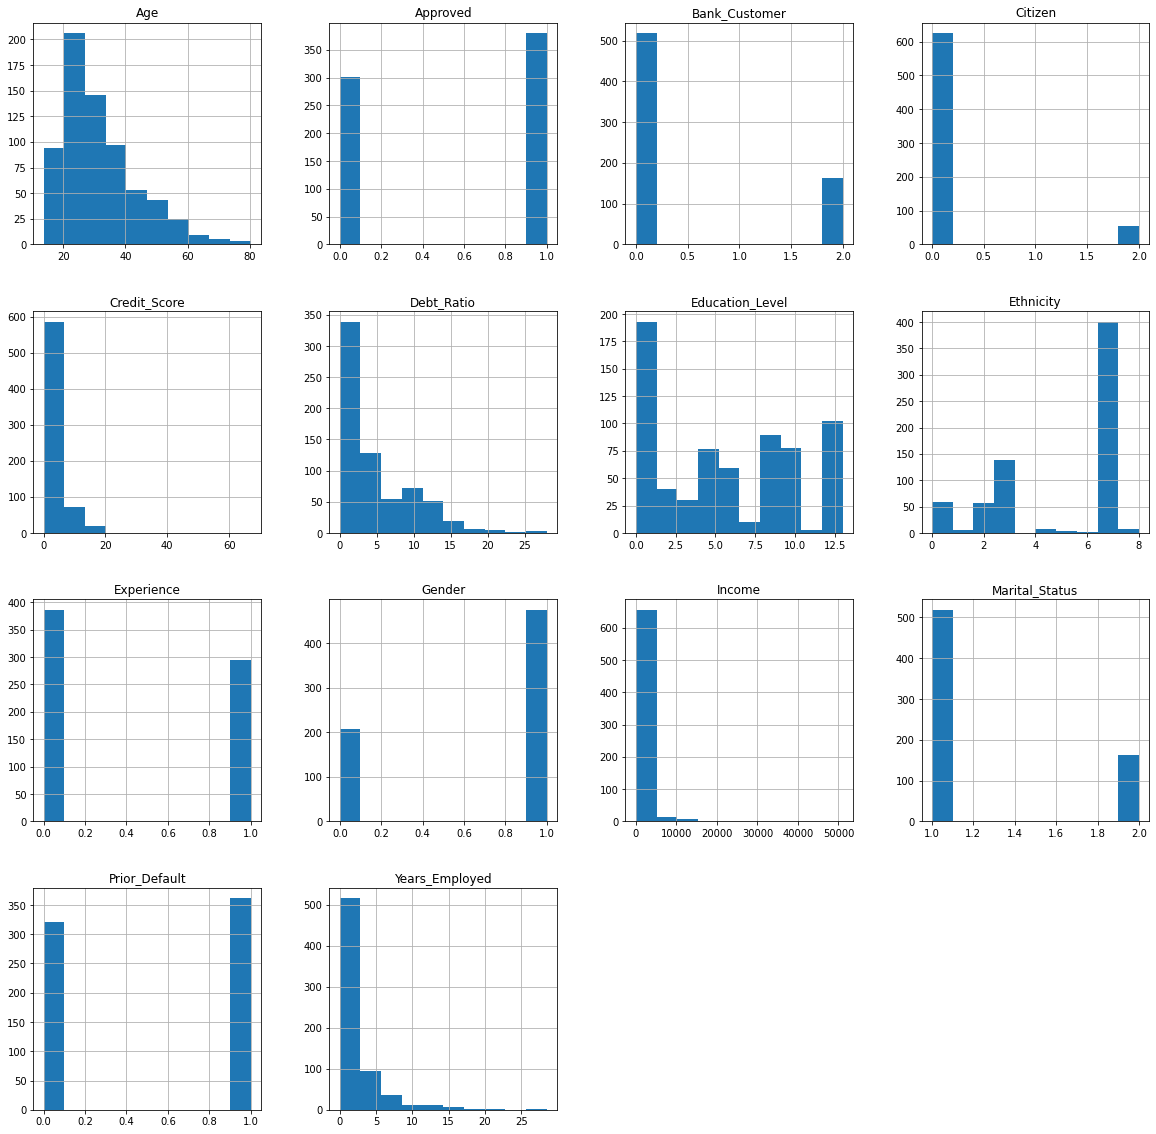

In [33]:
df.hist(figsize = [20,20])
plt.show()

#### understanding the characteristics of People whose profiles are approved and Not approved

In [34]:
df_C1 = df[df['Approved'] == 1]
df_C1

,Gender,Age,Debt_Ratio,Marital_Status,Bank_Customer,Education_Level,Ethnicity,Years_Employed,Prior_Default,Experience,Credit_Score,Citizen,Income,Approved
70,1,32.33,7.500,1,0,4,0,1.585,1,0,0,2,0,1
71,1,34.83,4.000,1,0,3,0,12.500,1,0,0,0,0,1
72,0,38.58,5.000,1,0,2,7,13.500,1,0,0,0,0,1
73,1,44.25,0.500,1,0,9,7,10.750,1,0,0,2,0,1
74,1,44.83,7.000,2,2,1,7,1.625,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,2,2,4,3,1.250,0,0,0,0,0,1
686,0,22.67,0.750,1,0,1,7,2.000,0,1,2,0,394,1
687,0,25.25,13.500,2,2,5,2,2.000,0,1,1,0,1,1
688,1,17.92,0.205,1,0,0,7,0.040,0,0,0,0,750,1


In [35]:
df_C0 = df[df['Approved'] == 0]
df_C0

,Gender,Age,Debt_Ratio,Marital_Status,Bank_Customer,Education_Level,Ethnicity,Years_Employed,Prior_Default,Experience,Credit_Score,Citizen,Income,Approved
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,0,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,1,20.08,0.125,1,0,10,7,1.00,0,1,1,0,768,0
599,1,20.50,2.415,1,0,1,7,2.00,1,1,11,0,3000,0
600,0,29.50,0.460,1,0,8,7,0.54,1,1,4,0,500,0
606,1,16.17,0.040,1,0,1,7,0.04,0,0,0,0,0,0


In [36]:
cols = df_C1.columns

In [37]:
cols

Index(['Gender', 'Age', 'Debt_Ratio', 'Marital_Status', 'Bank_Customer',
       'Education_Level', 'Ethnicity', 'Years_Employed', 'Prior_Default',
       'Experience', 'Credit_Score', 'Citizen', 'Income', 'Approved'],
      dtype='object')

In [38]:
# Binning Data against Age Group- Diving deeper into the distribution of Data to arrive at the target group of people

df_bins = pd.DataFrame(df_C1,columns=cols)
Edu_bins=[0,3,4,8,9,13]
Cre_bins=[0,10,11,20,21,30,31,40]
df_C1['Edu_bins'] = pd.cut(df_C1['Education_Level'],Edu_bins)
df_C1['Cre_bins'] = pd.cut(df_C1['Credit_Score'],Cre_bins)
df_C1

C:\Users\Mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Gender,Age,Debt_Ratio,Marital_Status,Bank_Customer,Education_Level,Ethnicity,Years_Employed,Prior_Default,Experience,Credit_Score,Citizen,Income,Approved,Edu_bins,Cre_bins
70,1,32.33,7.500,1,0,4,0,1.585,1,0,0,2,0,1,"(3.0, 4.0]",NaN
71,1,34.83,4.000,1,0,3,0,12.500,1,0,0,0,0,1,"(0.0, 3.0]",NaN
72,0,38.58,5.000,1,0,2,7,13.500,1,0,0,0,0,1,"(0.0, 3.0]",NaN
73,1,44.25,0.500,1,0,9,7,10.750,1,0,0,2,0,1,"(8.0, 9.0]",NaN
74,1,44.83,7.000,2,2,1,7,1.625,0,0,0,0,2,1,"(0.0, 3.0]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,2,2,4,3,1.250,0,0,0,0,0,1,"(3.0, 4.0]",NaN
686,0,22.67,0.750,1,0,1,7,2.000,0,1,2,0,394,1,"(0.0, 3.0]","(0.0, 10.0]"
687,0,25.25,13.500,2,2,5,2,2.000,0,1,1,0,1,1,"(4.0, 8.0]","(0.0, 10.0]"
688,1,17.92,0.205,1,0,0,7,0.040,0,0,0,0,750,1,NaN,NaN


#### Scaling the Data - To bring all the data into a similar range.

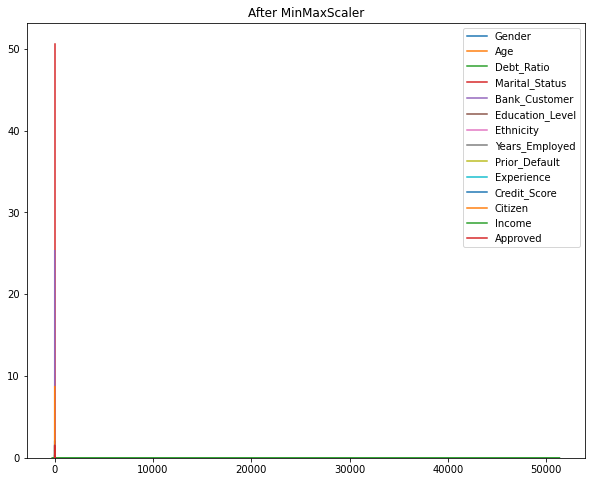

In [39]:
from sklearn import metrics
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
col_names = list(df.columns)
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(df)

df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After MinMaxScaler')
sns.kdeplot(df["Gender"], ax=ax1)
sns.kdeplot(df["Age"], ax=ax1)
sns.kdeplot(df["Debt_Ratio"], ax=ax1)
sns.kdeplot(df["Marital_Status"], ax=ax1)
sns.kdeplot(df["Bank_Customer"], ax=ax1)
sns.kdeplot(df["Education_Level"], ax=ax1)
sns.kdeplot(df["Ethnicity"], ax=ax1)
sns.kdeplot(df["Years_Employed"], ax=ax1)
sns.kdeplot(df["Prior_Default"], ax=ax1)
sns.kdeplot(df["Experience"], ax=ax1)
sns.kdeplot(df["Credit_Score"], ax=ax1)
sns.kdeplot(df["Citizen"], ax=ax1)
sns.kdeplot(df["Income"], ax=ax1)
sns.kdeplot(df["Approved"], ax=ax1);

## Data Modellling & Evaluation

C:\Users\Mohan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:62: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()
C:\Users\Mohan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:62: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


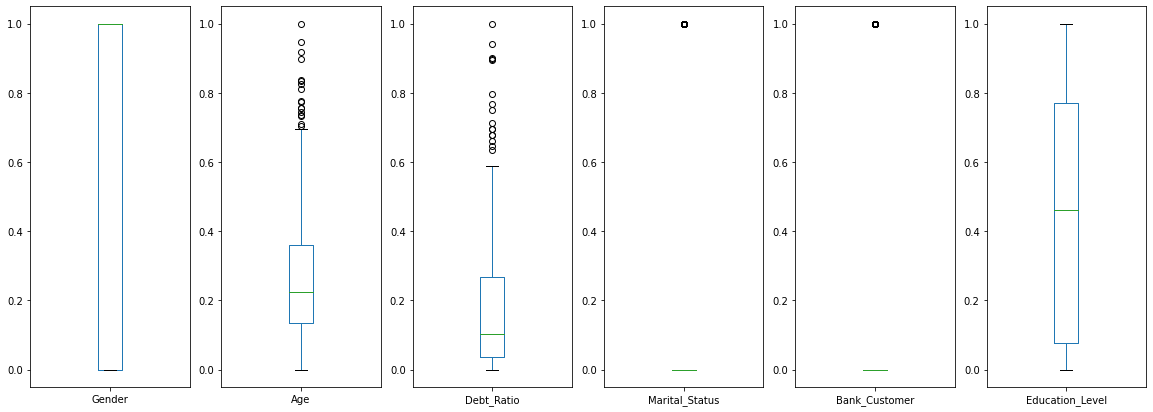

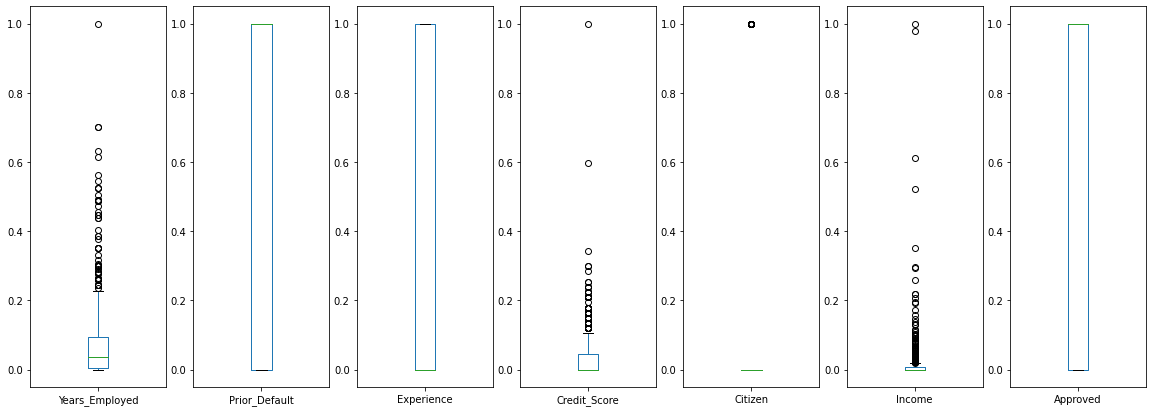

In [40]:
# plot box plots for independent feature(features with numerical values) to check the outliers
fig, ax = plt.subplots(figsize=(20,7))
df_mm.iloc[:,0:6].plot(kind="box",subplots = True, ax=ax)

fig, ax = plt.subplots(figsize=(20,7))
df_mm.iloc[:,7:14].plot(kind="box",subplots = True, ax=ax)

plt.show()

#### Dealing With Outliers

In [41]:
df_treated = df_mm.copy()  # make copy of orignal dataframe

# function to replace upper outlier with their max value of (Q3 + 1.5 * IRQ)
def treat_upper_outliers(df1, colname):
    data = df1[colname]
    irq = np.quantile(a=data,q=0.75)-np.quantile(a=data,q=0.25)
    ub = np.quantile(a=data,q=0.75) + 1.5 * irq
    df1[colname] = df1[colname].apply(lambda x: ub if x > ub else x)
    
# function to replace lower outlier with their min value of (Q1 - 1.5 * IRQ)
def treat_lower_outliers(df1, colname):
    data = df1[colname]
    irq = np.quantile(a=data,q=0.75)-np.quantile(a=data,q=0.25)
    lb = np.quantile(a=data,q=0.25) - 1.5 * irq
    df1[colname] = df1[colname].apply(lambda x: lb if x < lb else x)

# outlier treatment
treat_upper_outliers(df_treated, "Age") 
treat_upper_outliers(df_treated, "Debt_Ratio") 
treat_upper_outliers(df_treated, "Marital_Status") 
treat_upper_outliers(df_treated, "Bank_Customer") 
treat_upper_outliers(df_treated, "Years_Employed") 
treat_upper_outliers(df_treated, "Credit_Score") 
treat_upper_outliers(df_treated, "Income")

C:\Users\Mohan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:62: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()
C:\Users\Mohan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:62: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


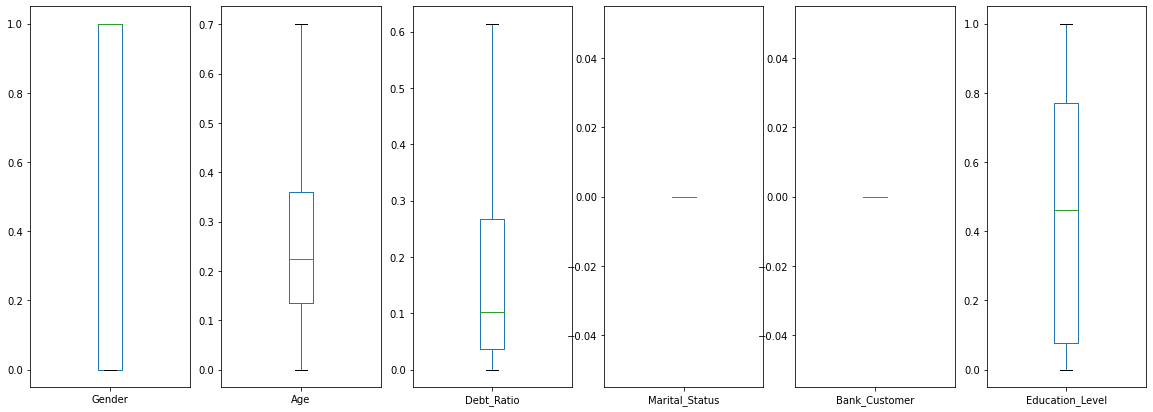

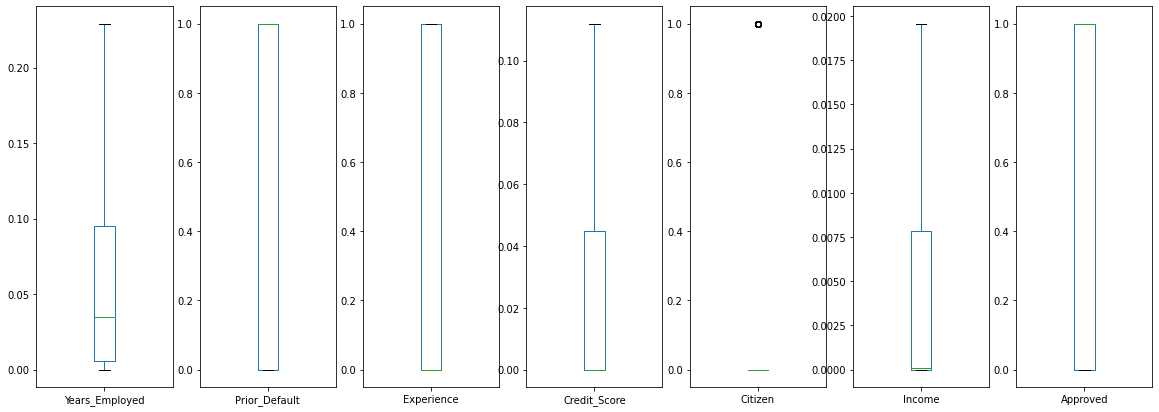

In [42]:
# plot box plots for independent feature(features with numerical values) to check the outliers
fig, ax = plt.subplots(figsize=(20,7))
df_treated.iloc[:,0:6].plot(kind="box",subplots = True, ax=ax)

fig, ax = plt.subplots(figsize=(20,7))
df_treated.iloc[:,7:14].plot(kind="box",subplots = True, ax=ax)

plt.show()

C:\Users\Mohan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Mohan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Mohan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Mohan\Anaconda3\lib\site-packages\pandas\plotting\_matpl

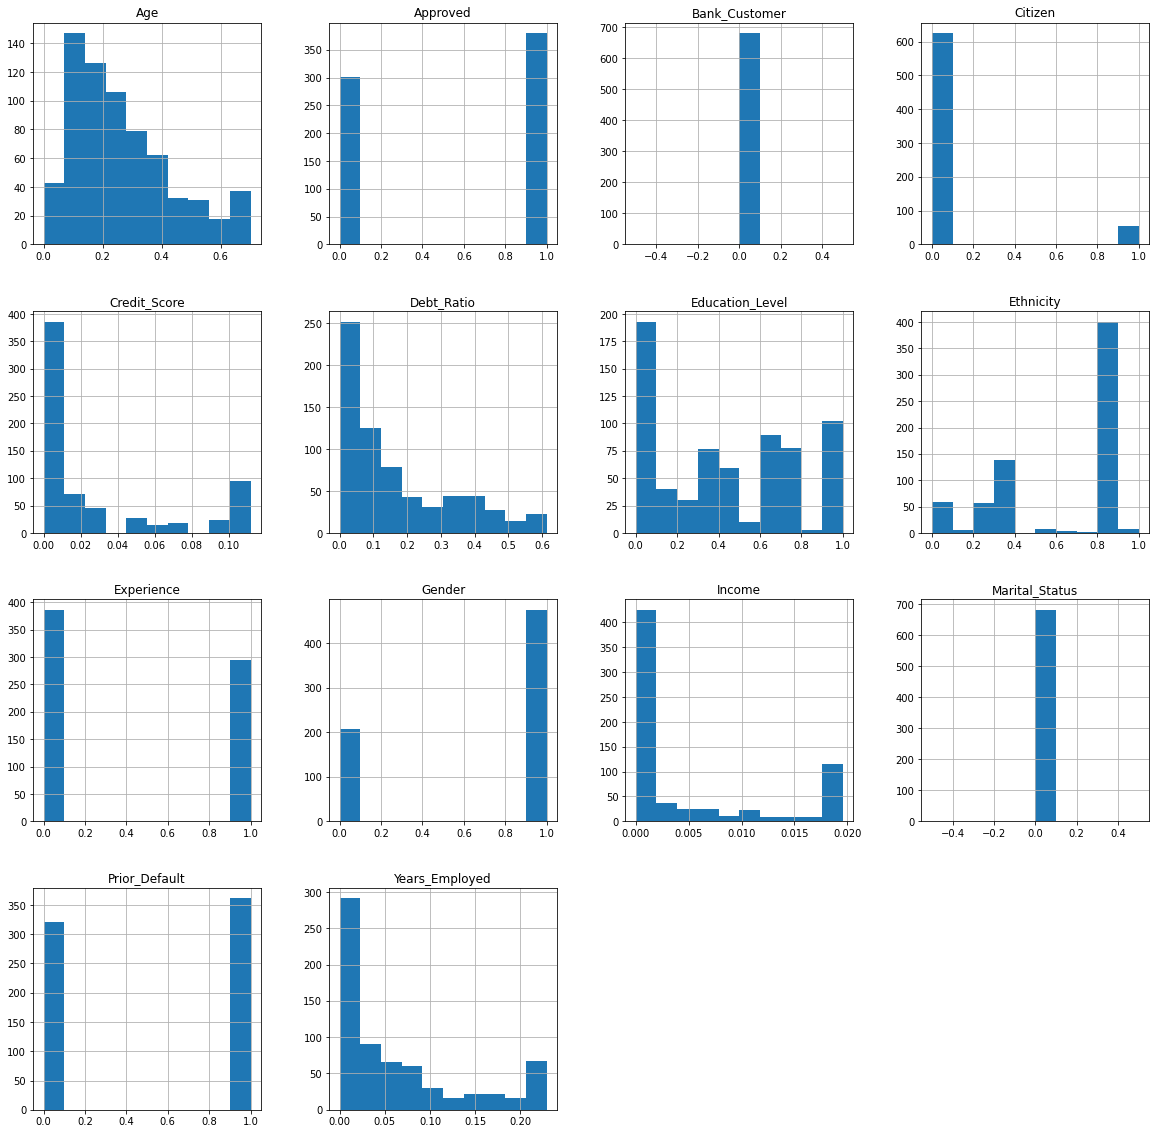

In [43]:
df_treated.hist(figsize = [20,20])
plt.show()

In [44]:
df_treated.head()

,Gender,Age,Debt_Ratio,Marital_Status,Bank_Customer,Education_Level,Ethnicity,Years_Employed,Prior_Default,Experience,Credit_Score,Citizen,Income,Approved
0,1.0,0.256842,0.000000,0.0,0.0,0.923077,0.875,0.043860,1.0,1.0,0.014925,0.0,0.000000,0.0
1,0.0,0.675489,0.159286,0.0,0.0,0.769231,0.375,0.106667,1.0,1.0,0.089552,0.0,0.010959,0.0
2,0.0,0.161654,0.017857,0.0,0.0,0.769231,0.375,0.052632,1.0,0.0,0.000000,0.0,0.016125,0.0
3,1.0,0.211729,0.055000,0.0,0.0,0.923077,0.875,0.131579,1.0,1.0,0.074627,0.0,0.000059,0.0
4,1.0,0.096541,0.200893,0.0,0.0,0.923077,0.875,0.060000,1.0,0.0,0.000000,1.0,0.000000,0.0


In [45]:
df_treated.tail()

,Gender,Age,Debt_Ratio,Marital_Status,Bank_Customer,Education_Level,Ethnicity,Years_Employed,Prior_Default,Experience,Credit_Score,Citizen,Income,Approved
676,1.0,0.110226,0.360179,0.0,0.0,0.307692,0.375,0.043860,0.0,0.0,0.000000,0.0,0.000000,1.0
677,0.0,0.134135,0.026786,0.0,0.0,0.076923,0.875,0.070175,0.0,1.0,0.029851,0.0,0.007710,1.0
678,0.0,0.172932,0.482143,0.0,0.0,0.384615,0.250,0.070175,0.0,1.0,0.014925,0.0,0.000020,1.0
679,1.0,0.062707,0.007321,0.0,0.0,0.000000,0.875,0.001404,0.0,0.0,0.000000,0.0,0.014677,1.0
680,1.0,0.319549,0.120536,0.0,0.0,0.076923,0.375,0.229035,0.0,0.0,0.000000,0.0,0.000000,1.0


#### Splitting the Dataset

In [46]:
feature_df = df_treated.drop(columns=["Approved"])
target_df = df_treated["Approved"]

X = np.array(feature_df)
y = np.array(target_df)

# split dataset into training and test data with 70:30 split
test_size = 0.30 # taking 70:30 training and test set
seed = 0  # Random numbmer seeding for reapeatability of the code

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size,random_state=seed)

### Implementing the Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion = 'entropy', random_state=0)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

#### Studying the Feature Importance

In [48]:
# for above trained model get the feature importance
feature_imp = pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = feature_df.columns)
print(feature_imp)

                      Imp
Gender           0.006986
Age              0.070761
Debt_Ratio       0.151964
Marital_Status   0.000000
Bank_Customer    0.000000
Education_Level  0.045627
Ethnicity        0.008716
Years_Employed   0.088122
Prior_Default    0.477855
Experience       0.027408
Credit_Score     0.000000
Citizen          0.004991
Income           0.117571


[0.01631078 0.12515646 0.10341561 0.         0.         0.03771271
 0.02439574 0.09420467 0.45759898 0.00457634 0.04958447 0.
 0.08704424]


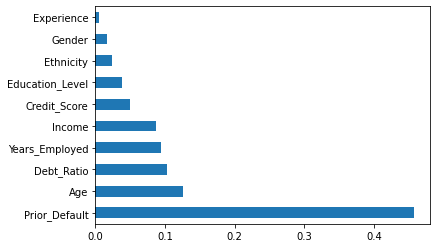

In [49]:
X = np.array(feature_df)
y = np.array(target_df)
model = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index = feature_df.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Prediction Using **Decision Tree Classifier**

#### Decision Tree Classifier Accuracy

In [50]:
# predict the outcome for test data
y_predict = dt_model.predict(X_test)

# calculate accuracy score on test data(this is unseen data not used while modeling)
acc = metrics.accuracy_score(y_test,y_predict)
print("\nAccuracy Score on test data: ", acc)


Accuracy Score on test data:  0.8585365853658536


#### Decision Tree Classifier K Fold Cross Validation Accuracy

In [51]:
# KFold cross validation to get range estimate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import validation_curve
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=7, scoring='accuracy')
print("KFold Cross Validation: Accuracy: %0.04f (+/- %0.4f) [Decision Tree]" %(dt_scores.mean()*100, dt_scores.std()*100))
dt_cv_scores = dt_scores

KFold Cross Validation: Accuracy: 81.5126 (+/- 3.1302) [Decision Tree]


#### Crosstab analysis (true values vs predicted values)

In [52]:
# cross tab analysis helps to get precision and recall values for each class..

# precision tells, how many of the selected objects were correct
# recall tells, how well model is able to classify the object

# Performing cross tab analysis between tue and predicted values.
# first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
res = pd.crosstab(y_test, y_predict)

# visualizing the crosstab
print_res = res.copy()
print_res.columns = ['pred:no', 'pred:yes']
print_res.index = ['true:no', 'true:yes']
print("Crosstab Matrix:\n\n ", print_res)

# data for precision and recall calculation for Class0 (Healthy)
class0_tp = res[0][0] # [True Positive] correctly idenfying class0
class0_fn = res[1][0] # [False Negative] not able to identify it as class0
class0_fp = res[0][1] # [Flase Positive] fasely identifying as class0

# data for precision and recall calculation for Class1 (patient with Parkinson's disease)
class1_tp = res[1][1] # [True Positive] correctly idenfying class1
class1_fn = res[0][1] # [False Negative] not able to identify it as class1
class1_fp = res[1][0] # [Flase Positive] fasely identifying as class1

# calculating presision and recall for class0
class0_precision = class0_tp / (class0_tp + class0_fp)
class0_recall = class0_tp / (class0_tp + class0_fn)

# calculating presision and recall for class1
class1_precision = class1_tp / (class1_tp + class1_fp)
class1_recall = class1_tp / (class1_tp + class1_fn)

print("\nclass0 [Rejected]:                precision: %0.2f, recall:  %0.2f" %(class0_precision,class0_recall))
print("class1 [Approved]: precision: %0.2f, recall:  %0.2f" %(class1_precision,class1_recall))

Crosstab Matrix:

            pred:no  pred:yes
true:no        79        14
true:yes       15        97

class0 [Rejected]:                precision: 0.84, recall:  0.85
class1 [Approved]: precision: 0.87, recall:  0.87


#### Observation - Crosstab analysis - Decision tree Classifier

**Crosstab provide some additial insight as below:**

1. recall % of target classification as belwow:
2. **Correctly** predicting **Rejection**: **85%** 
3. **Correctly** predicting patient **Approvals** : **87%**

**On test data :**

1. Out of **93 Rejections**, model is able to classify **79 cases** as **Rejected** with recall rate as **85%**
2. Out of **112 Approvals*, model is able to classify **97 cases** as having **Approvals** with **87% recall rate**

#### Confusion Matrix (true values vs predicted values) - Decision tree

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_predict, labels=[1,0]))

[[97 15]
 [14 79]]


Confusion matrix, without normalization
[[97 15]
 [14 79]]

Classification Report::
               precision    recall  f1-score   support

         0.0       0.84      0.85      0.84        93
         1.0       0.87      0.87      0.87       112

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



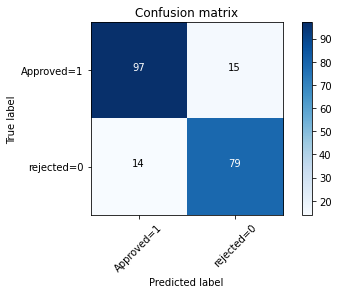

In [54]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Approved=1','rejected=0'],normalize= False,  title='Confusion matrix')

cr = metrics.classification_report(y_test, y_predict)
print("\nClassification Report::\n",cr)

### Parameter Regularisation for Understaning the Max Depth and Min Sample Leafs

**Approach**

1. Our target value is binary so it’s a binary classification problem. 
2. AUC is a good way for evaluation for this type of problems. 
3. Validation curve and KFold Cross validation is also used to get the best fit
4. Finally we can Regulariz more than one hyper-parameter together using GridSearchCV

**Step-1: there are many ways to evaluate influence of each parameter individually on model performance.**

**We will work on the following Procedure**

1. Validation curve for each parameter
2. ROC-AUV curve for each parameter
3. K-Fold CV analysis for each parameter

**Step-2:**

We will also Regularize more than one hyper-parameter together using GridSearchCV

**Step-3:**
    
1. Recreate model using best parameters as dereived from above experiments.
2. Analyse the accuracy on test data and observe confusison matrix
3. Using KFold CV, find range estimate for accuracy

**Step-4:** 

Sharing observation of this expereiment about how regularization helps.

In [55]:
from matplotlib.legend_handler import HandlerLine2D

# utility function to plot validation curve for hyper-parameter performance
# train_scores, test_scores 2D array of scores as generated by validation_curve
# param_range : range for hyper parameter use for validation curve..
def plot_validation_curve(param_range, train_scores, test_scores, title, xlabel):
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
   
    plt.figure(figsize=(15,5))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Score")
    plt.grid()
    #plt.ylim(0.0, 1.1)
    plt.fill_between(param_range, 
                     train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, 
                     alpha=0.2, color="r")
    plt.plot(param_range, train_scores_mean, 'o-', label="Training score", color="r")

    plt.fill_between(param_range, 
                     test_scores_mean - test_scores_std, 
                     test_scores_mean + test_scores_std, 
                     alpha=0.2, color="g")
    plt.plot(param_range, test_scores_mean, 'o-', label="Cross-validation score", color="g")

    plt.legend(loc="best")
    plt.xticks(param_range)
    plt.show()
    
# utility function to plot AUC graph for train and test score
def plot_roc_auc_graph(param_range, train_results, test_results, title, xlabel):
    plt.figure(figsize=(15,5))
    line1, = plt.plot(param_range, train_results, 'o-', color='r', label='Train AUC')
    line2, = plt.plot(param_range, test_results, 'o-', color='g', label='Test AUC')
    #plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.title(title)
    plt.ylabel('AUC score')
    plt.xlabel(xlabel)
    plt.grid()
    plt.legend(loc="best")
    plt.xticks(param_range)
    plt.show()
    
# utility function to plot CV scores
def plot_cv_score_curve(param_range, cv_scores, title, xlabel):
    
    scores_mean = np.mean(cv_scores, axis=1)
    scores_std = np.std(cv_scores, axis=1)
    
    plt.figure(figsize=(15,5))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Score")
    plt.grid()
    #plt.ylim(0.0, 1.1)

    plt.fill_between(param_range, 
                     scores_mean - scores_std, 
                     scores_mean + scores_std, 
                     alpha=0.2, color="g")
    plt.plot(param_range, scores_mean, 'o-', label="Cross-validation score", color="g")

    plt.legend(loc="best")
    plt.xticks(param_range)
    plt.show()

#### Iteration 1

In [56]:
df_treated.shape

(681, 14)

**Iteration-1: regularizing parameters:** 

max_depth:   max_depth indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. We fit a decision tree with depths ranging from 1 to 40 and plot the training and test scores.

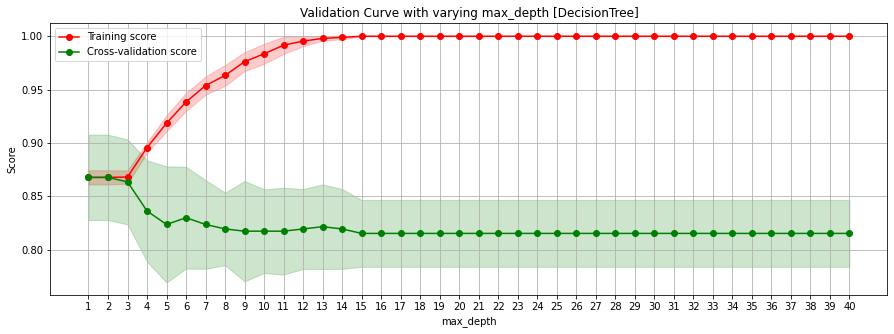

In [57]:
# regularizing max_depth - using validation curve

param_range = np.arange(1, 41, 1)
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=0)
train_scores, test_scores = validation_curve(dt_model, 
                                             X_train, 
                                             y_train, 
                                             param_name="max_depth",  
                                             param_range=param_range,
                                             cv=7, scoring="accuracy")

title = "Validation Curve with varying max_depth [DecisionTree]"
xlabel = "max_depth"
plot_validation_curve(param_range, train_scores, test_scores, title, xlabel)

**Validation curve observations:**

1. validation curve provide performance for both training and testing data
2. Max Depth of 6 gives highest accuracy with minumum variance.
3. We see that our model overfits for large depth values beyond 8. 
4. For max_depth > 14, the tree perfectly predicts all of the train data and accuracy reaches to 1, 
5. For increasing max_depts( > 5), due to increase in variance, performance reduces for test data as model fails to 
   generalize the findings for new data

6. However below 4, model does not provide better accuracy on test data.

#### Regularizing max_depth - using train and test AUC scores.

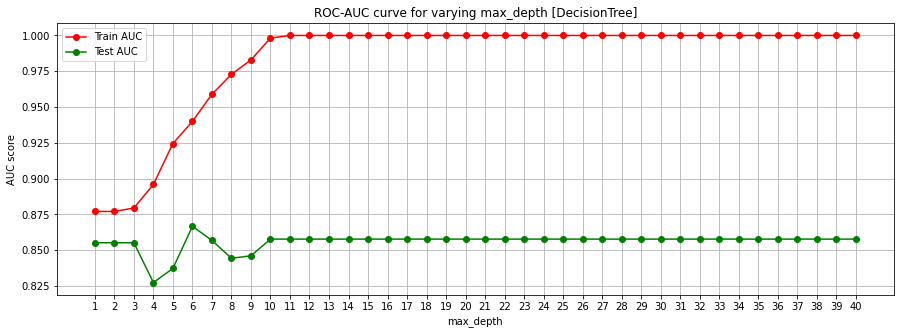

In [58]:
param_range = np.arange(1, 41, 1)
train_results = []
test_results = []
for i in param_range:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=0)
    dt.fit(X_train, y_train)
    # get roc-auc for training data
    y_train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_train, y_train_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc) # Add auc score to previous train results
    
    # get roc-auc for testing data
    y_test_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_test_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc) # Add auc score to previous test results

# plot AUC graph for train and test score
title = "ROC-AUC curve for varying max_depth [DecisionTree]"
xlabel = "max_depth"
plot_roc_auc_graph(param_range, train_results, test_results, title, xlabel)

#### ROC-AUC curve observations:

1. We see that our model overfits for large depth values beyond 10. 
2. For max_depth > 10, the tree perfectly predicts all of the train data and accuracy reaches to 1, 
3. For increasing max_depts( > 10), due to increase in variance, performance reduces for test data as model fails to 
   generalize the findings for new data

5. For max_depth=6, model provide highest accuracy with less variance and perform good for both training and test data
6. For max_depth=7,8 & 9 model perform better in training but not for test data.

#### Regularizing the Max Depth - using cross-validation technique

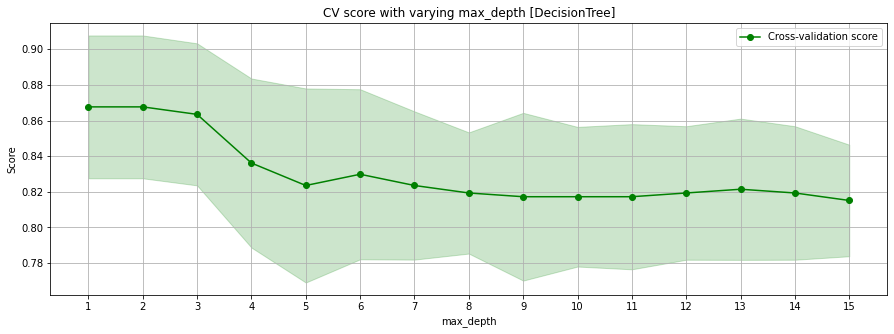

In [59]:
param_range = np.arange(1, 16, 1)
score_list = []

for i in param_range:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=0)
    scores = cross_val_score(estimator=dt, 
                             X=X_train, 
                             y=y_train, 
                             cv=7, 
                             scoring='accuracy') # Perform 7-fold cross validation 
    score_list.append(scores)

# plot CV accuracy score for varying max_depth
title = "CV score with varying max_depth [DecisionTree]"
xlabel = "max_depth"
score_arr = np.array(score_list) # convert into np-array
plot_cv_score_curve(param_range, score_arr, title, xlabel)

#### Observation:CV Score Using Cross validation Technique

1. Shadded portion indicate the variance in the accuracy score
2. we shall find the range estimates for the depths of 3,4,5&6

In [60]:
max_depth = 3
dt_model=DecisionTreeClassifier(criterion = 'entropy', max_depth=max_depth, random_state=0)
dt_model.fit(X_train,y_train)
# KFold cross validation to get range estimate
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=7, scoring='accuracy')
print("KFold Cross Validation: Accuracy: %0.04f (+/- %0.4f) [Decision Tree, max_depth = %d]" %(dt_scores.mean()*100, dt_scores.std()*100, max_depth))
dt_cv_scores_best_max_depth = dt_scores
max_depth = 4
dt_model=DecisionTreeClassifier(criterion = 'entropy', max_depth=max_depth, random_state=0)
dt_model.fit(X_train,y_train)
# KFold cross validation to get range estimate
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=7, scoring='accuracy')
print("KFold Cross Validation: Accuracy: %0.04f (+/- %0.4f) [Decision Tree, max_depth = %d]" %(dt_scores.mean()*100, dt_scores.std()*100, max_depth))


max_depth = 5
dt_model=DecisionTreeClassifier(criterion = 'entropy', max_depth=max_depth, random_state=0)
dt_model.fit(X_train,y_train)
# KFold cross validation to get range estimate
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=7, scoring='accuracy')
print("KFold Cross Validation: Accuracy: %0.04f (+/- %0.4f) [Decision Tree, max_depth = %d]" %(dt_scores.mean()*100, dt_scores.std()*100, max_depth))

max_depth = 6
dt_model=DecisionTreeClassifier(criterion = 'entropy', max_depth=max_depth, random_state=0)
dt_model.fit(X_train,y_train)
# KFold cross validation to get range estimate
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=7, scoring='accuracy')
print("KFold Cross Validation: Accuracy: %0.04f (+/- %0.4f) [Decision Tree, max_depth = %d]" %(dt_scores.mean()*100, dt_scores.std()*100, max_depth))

max_depth = 7
dt_model=DecisionTreeClassifier(criterion = 'entropy', max_depth=max_depth, random_state=0)
dt_model.fit(X_train,y_train)
# KFold cross validation to get range estimate
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=7, scoring='accuracy')
print("KFold Cross Validation: Accuracy: %0.04f (+/- %0.4f) [Decision Tree, max_depth = %d]" %(dt_scores.mean()*100, dt_scores.std()*100, max_depth))


KFold Cross Validation: Accuracy: 86.3445 (+/- 3.9861) [Decision Tree, max_depth = 3]
KFold Cross Validation: Accuracy: 83.6134 (+/- 4.7444) [Decision Tree, max_depth = 4]
KFold Cross Validation: Accuracy: 82.3529 (+/- 5.4460) [Decision Tree, max_depth = 5]
KFold Cross Validation: Accuracy: 82.9832 (+/- 4.7722) [Decision Tree, max_depth = 6]
KFold Cross Validation: Accuracy: 82.3529 (+/- 4.1595) [Decision Tree, max_depth = 7]


##### Observation

**max_depth @ 3 provides the better accuracy with lowest variance**

In [61]:
best_max_depth = 3

print("Optimal best_depth: %d" %(best_max_depth)) 
print("KFold Cross Validation: Accuracy: %0.04f (+/- %0.4f) [Decision Tree]" %(dt_cv_scores_best_max_depth.mean()*100, dt_cv_scores_best_max_depth.std()*100))

Optimal best_depth: 3
KFold Cross Validation: Accuracy: 86.3445 (+/- 3.9861) [Decision Tree]


### Iteration 2

**Iteration-2: regularizing parameters:** 

min_Samples_leaf:min_Samples_leaf is thee minimum number of samples required at a leaf Node.

#### regularizing min_sample_leaf - using validation curve

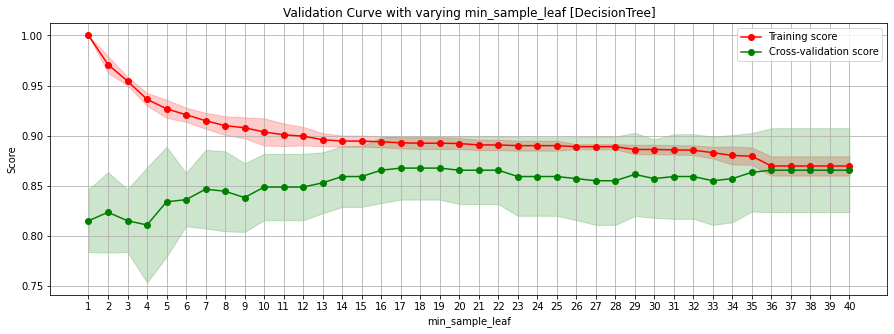

In [62]:
param_range = np.arange(1, 41, 1)
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=0)
train_scores, test_scores = validation_curve(dt_model, 
                                             X_train, 
                                             y_train, 
                                             param_name="min_samples_leaf", 
                                             param_range=param_range,
                                             cv=7, 
                                             scoring="accuracy")

title = "Validation Curve with varying min_sample_leaf [DecisionTree]"
xlabel = "min_sample_leaf"
plot_validation_curve(param_range, train_scores, test_scores, title, xlabel)

#### Observation - validation curve Min Sample Leaf @ Node

1. Increasing min_sample_leaf, the model performance descreses on training data and beyond 15 model performs
   poorly on both the training and tetsing datatset as it cannot learn enough about the data and may cause underfitting.

2. Min_samples_leaf=2,3 provide better accuracy with less variances

**We can further evalute the influence of min_sample_leaf using K-Fold technique and calculate range estimate for identifying optimal value**

#### Regularizing min_sample_leaf: using training and test auc scores.

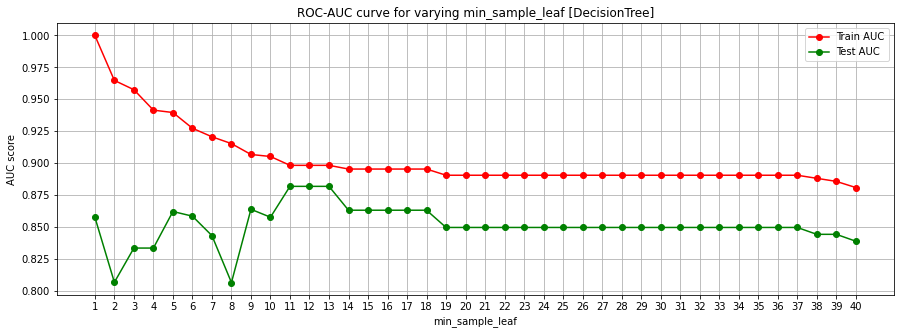

In [63]:
param_range = np.arange(1, 41, 1)
train_results = []
test_results = []
for i in param_range:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=i, random_state=0)
    dt.fit(X_train, y_train)
    # get roc-auc for training data
    y_train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_train, y_train_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc) # Add auc score to previous train results
    
    # get roc-auc for testing data
    y_test_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_test_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc) # Add auc score to previous test results

# plot AUC graph for train and test score
title = "ROC-AUC curve for varying min_sample_leaf [DecisionTree]"
xlabel = "min_sample_leaf"
plot_roc_auc_graph(param_range, train_results, test_results, title, xlabel)

#### Observation - AUC Score - Min Sample leaf

Increasing min_sample_leaf value beyond 5, the model cannot learn enough about the data and may cause underfitting.

#### regularizing min_sample_leaf - by cross-validation

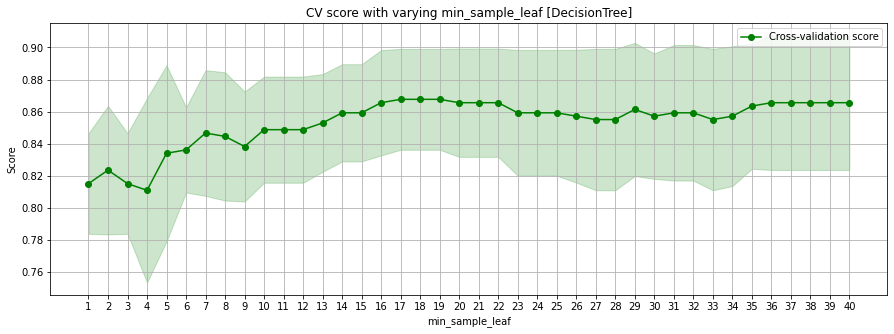

In [64]:
param_range = np.arange(1, 41, 1)
score_list = [] # empty list that will hold cv scores

for i in param_range:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=i, random_state=0)
    scores = cross_val_score(estimator=dt, 
                             X=X_train, 
                             y=y_train, 
                             cv=7, scoring='accuracy') # Perform 7-fold cross validation 
    score_list.append(scores)

# plot CV accuracy score for varying min_sample_leaf
title = "CV score with varying min_sample_leaf [DecisionTree]"
xlabel = "min_sample_leaf"
score_arr = np.array(score_list) # convert into np-array
plot_cv_score_curve(param_range, score_arr, title, xlabel)

#### Observation - Cross Validation Score - Min Sample leaf

**Shadded portion indicate the variance in the accuracy score**

1. Increasing min_sample_leaf, the model performance descreses on training data and beyond 20 model performs poorly on both 
   the training and tetsing datatset as it cannot learn enough about the data and may cause underfitting.
2. min_samples_leaf=16,17,18 provide better accuracy with less variances

#### Range Estimate for min_sample_leaf=16,17,18 and choose the optimal one

In [65]:
min_samples_leaf = 16
dt_model=DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=min_samples_leaf, random_state=0)
dt_model.fit(X_train,y_train)

# KFold cross validation to get range estimate
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=7, scoring='accuracy')
print("KFold CV: Accuracy: %0.04f (+/- %0.4f) [Decision Tree, min_sample_leaf = %d]" %(dt_scores.mean()*100, dt_scores.std()*100, min_samples_leaf))

min_samples_leaf = 17
dt_model=DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=min_samples_leaf, random_state=0)
dt_model.fit(X_train,y_train)
# KFold cross validation to get range estimate
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=7, scoring='accuracy')
print("KFold CV: Accuracy: %0.04f (+/- %0.4f) [Decision Tree, min_sample_leaf = %d]" %(dt_scores.mean()*100, dt_scores.std()*100, min_samples_leaf))

# retain the optimal score data
dt_cv_scores_best_min_samples_leaf = dt_scores

min_samples_leaf = 18
dt_model=DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=min_samples_leaf, random_state=0)
dt_model.fit(X_train,y_train)
# KFold cross validation to get range estimate
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=7, scoring='accuracy')
print("KFold CV: Accuracy: %0.04f (+/- %0.4f) [Decision Tree, min_sample_leaf = %d]" %(dt_scores.mean()*100, dt_scores.std()*100, min_samples_leaf))

KFold CV: Accuracy: 86.5546 (+/- 3.2816) [Decision Tree, min_sample_leaf = 16]
KFold CV: Accuracy: 86.7647 (+/- 3.1442) [Decision Tree, min_sample_leaf = 17]
KFold CV: Accuracy: 86.7647 (+/- 3.1442) [Decision Tree, min_sample_leaf = 18]


##### Observation

Min Sample Leaf = 17 offers the best accuracy with less variance 

In [66]:
# as per above experiment, min_samples_leaf=3 provide the better accuracy with lowest variance
best_min_samples_leaf = 17

print("Optimal min_samples_leaf: %d" %(best_min_samples_leaf)) 
print("KFold CV: Accuracy: %0.04f (+/- %0.4f) [Decision Tree]" %(dt_cv_scores_best_min_samples_leaf.mean()*100, dt_cv_scores_best_min_samples_leaf.std()*100))

Optimal min_samples_leaf: 17
KFold CV: Accuracy: 86.7647 (+/- 3.1442) [Decision Tree]


### Iteration 3

#### regularizing multiple parameter together using GridSearchCV

So far we were regularizing parameters individually(max_depth or min_sample_leaf) and analysing how the individual hyper parameter influence the model performance.But model shall be determined considering all hyper parameter together we can optimize for more than one hyper-parameter together using GridSearchCV

In [138]:
from sklearn.model_selection import GridSearchCV

# list of hyper parameters and its values for experiment
parameters = {'max_depth':list(range(2,41)),'min_samples_leaf':range(1,41)}

dt_model = DecisionTreeClassifier(criterion='entropy', random_state=0)

clf = GridSearchCV(estimator=dt_model, param_grid=parameters, cv=7, scoring='accuracy')
clf.fit(X_train, y_train)
best_tree_model_dt = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.8676470588235293 {'max_depth': 2, 'min_samples_leaf': 1}


**Observation**

Since GridSearchCV is giving the optimal value as max_depth=2, and min_samples_leaf=1. Lets recalculate the Range estimates and calculate the Accuracy

#### Range Estimates for the max Depth = 2

In [68]:
max_depth = 2
dt_model=DecisionTreeClassifier(criterion = 'entropy', max_depth=max_depth, random_state=0)
dt_model.fit(X_train,y_train)
# KFold cross validation to get range estimate
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=7, scoring='accuracy')
print("KFold Cross Validation: Accuracy: %0.04f (+/- %0.4f) [Decision Tree, max_depth = %d]" %(dt_scores.mean()*100, dt_scores.std()*100, max_depth))
dt_cv_scores_best_max_depth = dt_scores

KFold Cross Validation: Accuracy: 86.7647 (+/- 4.0081) [Decision Tree, max_depth = 2]


#### Range Estimates for the min sample leaf = 1

In [69]:
min_samples_leaf = 1
dt_model=DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=min_samples_leaf, random_state=0)
dt_model.fit(X_train,y_train)

# KFold cross validation to get range estimate
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=7, scoring='accuracy')
print("KFold CV: Accuracy: %0.04f (+/- %0.4f) [Decision Tree, min_sample_leaf = %d]" %(dt_scores.mean()*100, dt_scores.std()*100, min_samples_leaf))
dt_cv_scores_best_min_samples_leaf = dt_scores

KFold CV: Accuracy: 81.5126 (+/- 3.1302) [Decision Tree, min_sample_leaf = 1]


**Observation**

The earlier Calculations though calculated the same accuracy, it was compromised on computational expense.

## Recreate the model with optimal hyper parameters

In [70]:
# optimal hyper-parameters values
best_max_depth = 2
best_min_samples_leaf = 1

dt_model_final=DecisionTreeClassifier(criterion = 'entropy', max_depth = best_max_depth, min_samples_leaf=best_min_samples_leaf, random_state=0)
dt_model_final.fit(X_train,y_train)

# KFold cross validation to get range estimate
dt_scores = cross_val_score(dt_model_final, X_train, y_train, cv=7, scoring='accuracy')

# retain the optimal score data
dt_cv_scores_final = dt_scores

print("Optimal hyperparameter are: max_depth: %d, min_samples_leaf: %d" %(best_max_depth, best_min_samples_leaf)) 
print("KFold Cross Validation: Accuracy: %0.04f (+/- %0.4f) [Decision Tree]" %(dt_cv_scores_final.mean()*100, dt_cv_scores_final.std()*100))

Optimal hyperparameter are: max_depth: 2, min_samples_leaf: 1
KFold Cross Validation: Accuracy: 86.7647 (+/- 4.0081) [Decision Tree]


### Prediction with Optinmal Hyper Parameters

In [71]:
# using the above hyper parameters, predict the outcome for test data

print("\nAccuracy after Regularizing hyper Parameter: ")
y_predict = dt_model_final.predict(X_test)

# calculate accuracy score on test data (this is unseen data)
acc = metrics.accuracy_score(y_test,y_predict)
print("\nProduction: Accuracy Score: ", acc)

#Confusion Matric: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
cm = metrics.confusion_matrix(y_test, y_predict)
print("\nConfusion Matrix\n", cm)

# analysing cross-tab using classification report for the model
cr = metrics.classification_report(y_test, y_predict)
print("\nClassification Report::\n",cr)


Accuracy after Regularizing hyper Parameter: 

Production: Accuracy Score:  0.848780487804878

Confusion Matrix
 [[86  7]
 [24 88]]

Classification Report::
               precision    recall  f1-score   support

         0.0       0.78      0.92      0.85        93
         1.0       0.93      0.79      0.85       112

    accuracy                           0.85       205
   macro avg       0.85      0.86      0.85       205
weighted avg       0.86      0.85      0.85       205



## Comparision - Decision Tree(Default) Vs Decision Tree(Optimal Hyper Parameter)

In [72]:
## Let's compare the performance result of both default Dicision Tree and Dicision tree with optimal hyper parameter 

print("Performance Camparision: DecisionTree(Default) Vs DecisionTree(Optimal)\n")
      
print("KFold CV: Accuracy: %0.04f (+/- %0.4f) [DecisionTree(Default)]" %(dt_cv_scores_best_max_depth.mean()*100, dt_cv_scores_best_max_depth.std()*100))
print("KFold CV: Accuracy: %0.04f (+/- %0.4f) [DecisionTree(Optimal)]" %(dt_cv_scores_final.mean()*100, dt_cv_scores_final.std()*100))

mean_diff = dt_cv_scores_final.mean() - dt_cv_scores_best_max_depth.mean()
std_diff = dt_cv_scores_final.std() - dt_cv_scores_best_max_depth.std()
print("\nImprovement:: Mean difference: %0.4F, Standard Deviation Difference: %0.4f" %(mean_diff*100, std_diff*100))

Performance Camparision: DecisionTree(Default) Vs DecisionTree(Optimal)

KFold CV: Accuracy: 86.7647 (+/- 4.0081) [DecisionTree(Default)]
KFold CV: Accuracy: 86.7647 (+/- 4.0081) [DecisionTree(Optimal)]

Improvement:: Mean difference: 0.0000, Standard Deviation Difference: 0.0000


### Implementing the Random Tree Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(criterion='entropy',random_state=0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Prediction - Random Forest

In [74]:
# predict the outcome for test data
y_predict = rf_model.predict(X_test)

# calculate accuracy score on test data (accuracy for unseen data)
acc = metrics.accuracy_score(y_test,y_predict)
print("\nProduction: Accuracy Score: ", acc)


Production: Accuracy Score:  0.848780487804878


### Validation - K Fold

In [75]:
# KFold validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=7, scoring='accuracy')
print("KFold CV: Accuracy: %0.04f (+/- %0.4f) [RandomForest-Default]" %(cv_scores.mean()*100, cv_scores.std()*100))

rf_kfold_cv_scores = cv_scores

KFold CV: Accuracy: 88.0252 (+/- 3.2816) [RandomForest-Default]


### Feature Imporatance

In [76]:
# For above trained model get the feature importance
feature_imp = pd.DataFrame(rf_model.feature_importances_, columns = ["Imp"], index = feature_df.columns)
print(feature_imp)

                      Imp
Gender           0.014765
Age              0.093312
Debt_Ratio       0.109520
Marital_Status   0.000000
Bank_Customer    0.000000
Education_Level  0.069763
Ethnicity        0.033407
Years_Employed   0.120959
Prior_Default    0.324197
Experience       0.047293
Credit_Score     0.086462
Citizen          0.016110
Income           0.084213


[0.02 0.1  0.11 0.   0.   0.08 0.03 0.11 0.3  0.05 0.09 0.01 0.1 ]


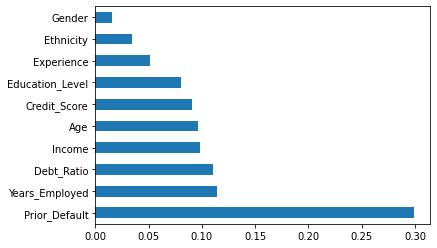

In [77]:
X = np.array(feature_df)
y = np.array(target_df)
model = RandomForestClassifier(criterion='entropy',random_state=0)
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index = feature_df.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### Regularizing n_estimators - using validation curve

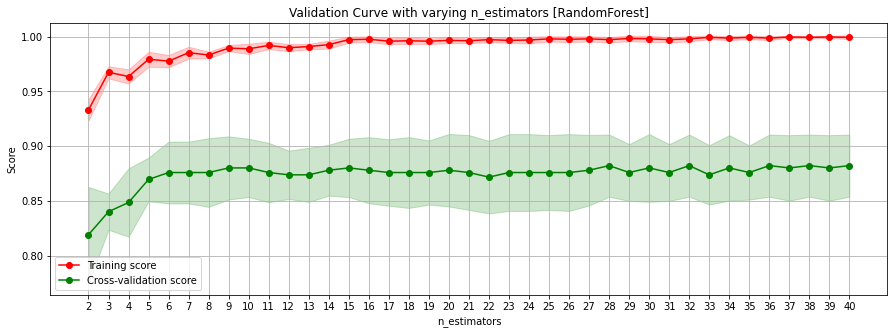

In [78]:
param_range = np.arange(2, 41, 1)
rf_model = RandomForestClassifier(criterion='entropy', random_state=0)
train_scores, test_scores = validation_curve(rf_model, 
                                             X_train, 
                                             y_train, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=7, 
                                             scoring="accuracy")

title = "Validation Curve with varying n_estimators [RandomForest]"
xlabel = "n_estimators"
plot_validation_curve(param_range, train_scores, test_scores, title, xlabel)

#### Observation - Validation Curve - Random Forest Classifier(Default)

1. validation curve provide performance for both training and testing data
2. We see that our model overfits for large n_estimators values beyond 15. 
3. For n_estimators > 15, the tree perfectly predicts all of the train data and accuracy reaches to 1, 
4. For increasing n_estimators( > 15), due to increase in variance, performance reduces for test data as model fails to generalize the findings for new data
5. Model provide best accuracy with low variance for n_estimators = 9

### Regularizing multiple parameter together using GridSearchCV

In [79]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': range(2,32)}

rf_model = RandomForestClassifier(criterion='entropy', random_state=0)

clf = GridSearchCV(estimator=rf_model, param_grid=parameters, cv=7, scoring='accuracy')
clf.fit(X_train, y_train) 

best_tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.8823529411764705 {'n_estimators': 28}


#### Observation

**As seen above both validation curve and GridSearchCV estimate optimal value for n_estimators =28**

### Finding Optimal n-Estimators with DTC Optimal Parameters

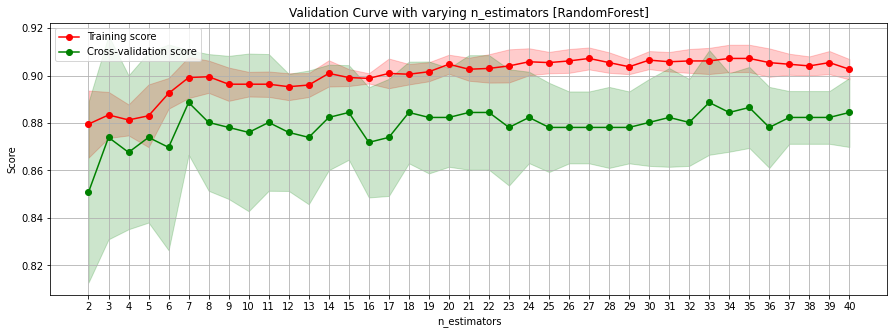

In [80]:
# lets try to identify the optimal n_estimators along with hyper-parameters as found in previous section of dicision tree
# for max_depth=4, min_samples_leaf=3

param_range = np.arange(2, 41, 1)

rf_model = RandomForestClassifier(criterion='entropy', random_state=0, max_depth=4, min_samples_leaf=3)
train_scores, test_scores = validation_curve(rf_model, 
                                             X_train, 
                                             y_train, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=7, 
                                             scoring="accuracy")

title = "Validation Curve with varying n_estimators [RandomForest]"
xlabel = "n_estimators"
plot_validation_curve(param_range, train_scores, test_scores, title, xlabel)

#### Observation - Validation Curve - RFC with DTC Optimal Parameters

**Model provide best accuracy with low variance for n_estimators = 33 for hyperparameters max_depth=4, min_samples_leaf=3**

### Regularisation - Optimal n-Estimators, optimal Max Depth & Min sample leaf.

In [139]:
# Let's use GridSearchCV to identify optimal hyper-parameters together for n_estimators, max_depth, min_samples_leaf

from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': range(2,16),'max_depth': range(2,10),'min_samples_leaf': range(2,10)}

rf_model = RandomForestClassifier(criterion='entropy', random_state=0)

clf = GridSearchCV(estimator=rf_model, param_grid=parameters, cv=7, scoring='accuracy')
clf.fit(X_train, y_train) 

best_tree_model_rt = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.8949579831932775 {'max_depth': 4, 'min_samples_leaf': 8, 'n_estimators': 7}


In [82]:
# Lets find the range estimate for following hyper-parameter combinations:
# Experiment-1: n_estimators = 28 
# Experiment-2: n_estimators = 33, max_depth=4, min_sample_leaf=3  (considering DT model optimal param)
# Experiment-3: n_estimators = 7, max_depth=4, min_sample_leaf=8  (as per GridSearchCV)

# Experiment-1
n_estimators = 28
rf_model = RandomForestClassifier(criterion='entropy', n_estimators = n_estimators, random_state=0)
rf_model.fit(X_train,y_train)
# KFold validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=7, scoring='accuracy')
print("Optimal parameters: n_estimators: %d" %(n_estimators))
print("KFold CV: Accuracy: %0.04f (+/- %0.4f) [RandomForest]" %(cv_scores.mean()*100, cv_scores.std()*100))

# Experiment-2
n_estimators = 33
max_depth = 4
min_samples_leaf = 3
rf_model = RandomForestClassifier(criterion='entropy',
                                  random_state=0, 
                                  n_estimators = n_estimators, 
                                  max_depth=max_depth,
                                  min_samples_leaf=min_samples_leaf)
rf_model.fit(X_train,y_train)
# KFold validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=7, scoring='accuracy')
print("\nOptimal parameters: n_estimators: %d, max_depth: %d, min_samples_leaf: %d" %(n_estimators,max_depth,min_samples_leaf))
print("KFold CV: Accuracy: %0.04f (+/- %0.4f) [RandomForest,]" %(cv_scores.mean()*100, cv_scores.std()*100))

#Experiment-3
n_estimators = 7
max_depth = 4
min_samples_leaf = 8
rf_model = RandomForestClassifier(criterion='entropy',
                                  random_state=0, 
                                  n_estimators = n_estimators, 
                                  max_depth=max_depth,
                                  min_samples_leaf=min_samples_leaf)
rf_model.fit(X_train,y_train)
# KFold validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=7, scoring='accuracy')
print("\nOptimal parameters: n_estimators: %d, max_depth: %d, min_samples_leaf: %d" %(n_estimators,max_depth,min_samples_leaf))
print("KFold CV: Accuracy: %0.04f (+/- %0.4f) [RandomForest,]" %(cv_scores.mean()*100, cv_scores.std()*100))

Optimal parameters: n_estimators: 28
KFold CV: Accuracy: 88.2353 (+/- 2.8342) [RandomForest]

Optimal parameters: n_estimators: 33, max_depth: 4, min_samples_leaf: 3
KFold CV: Accuracy: 88.8655 (+/- 2.2034) [RandomForest,]

Optimal parameters: n_estimators: 7, max_depth: 4, min_samples_leaf: 8
KFold CV: Accuracy: 89.4958 (+/- 2.2821) [RandomForest,]



Production: Accuracy Score:  0.8341463414634146
Confusion matrix, without normalization
[[92 20]
 [14 79]]

Classification Report::
               precision    recall  f1-score   support

         0.0       0.80      0.85      0.82        93
         1.0       0.87      0.82      0.84       112

    accuracy                           0.83       205
   macro avg       0.83      0.84      0.83       205
weighted avg       0.84      0.83      0.83       205



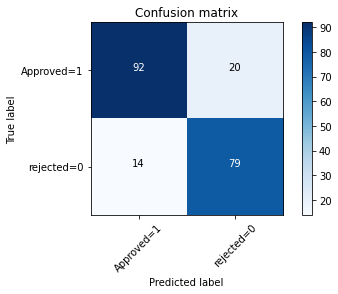

In [83]:
# as per above experiment, n_estimators = 7 provide the highest accuracy with bets range estimate
# Let's recreate the model with this parameter and perfomr production test and confusion matix

n_estimators = 7
rf_model_final = RandomForestClassifier(criterion='entropy', n_estimators = n_estimators, random_state=0)
rf_model_final.fit(X_train,y_train)

# predict the outcome for test data
y_predict = rf_model_final.predict(X_test)

# calculate accuracy score on test data (accuracy for unseen data)
acc = metrics.accuracy_score(y_test,y_predict)
print("\nProduction: Accuracy Score: ", acc)


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Approved=1','rejected=0'],normalize= False,  title='Confusion matrix')

cr = metrics.classification_report(y_test, y_predict)
print("\nClassification Report::\n",cr)

In [84]:
# KFold validation
cv_scores = cross_val_score(rf_model_final, X_train, y_train, cv=7, scoring='accuracy')
rf_cv_scores_final = cv_scores

print("Optimal parameter: n_estimators: %d" %(n_estimators))
print("KFold CV: Accuracy: %0.04f (+/- %0.4f) [RandomForest]" %(rf_cv_scores_final.mean()*100, rf_cv_scores_final.std()*100))

Optimal parameter: n_estimators: 7
KFold CV: Accuracy: 87.6050 (+/- 2.8186) [RandomForest]


In [85]:
# Let's compare the performance result of both Dicision Tree and Random forest 

print("Performance Camparision: Random forest Vs Decision Tree\n")
      
print("KFold CV: Accuracy: %0.04f (+/- %0.4f) [Random Forest]" %(rf_cv_scores_final.mean()*100, rf_cv_scores_final.std()*100))
print("KFold CV: Accuracy: %0.04f (+/- %0.4f) [Decision Tree]" %(dt_cv_scores_final.mean()*100, dt_cv_scores_final.std()*100))

mean_diff = rf_cv_scores_final.mean() - dt_cv_scores_final.mean()
std_diff = rf_cv_scores_final.std() - dt_cv_scores_final.std()
print("\nImprovement:: Mean difference: %0.4F, Standard Deviation Difference: %0.4f" %(mean_diff*100, std_diff*100))

Performance Camparision: Random forest Vs Decision Tree

KFold CV: Accuracy: 87.6050 (+/- 2.8186) [Random Forest]
KFold CV: Accuracy: 86.7647 (+/- 4.0081) [Decision Tree]

Improvement:: Mean difference: 0.8403, Standard Deviation Difference: -1.1896


### Implementing the Ada Boost Classifier

### Fitting Model - Ada Boost Classifier

In [86]:
from sklearn.ensemble import AdaBoostClassifier

ab_model = AdaBoostClassifier(n_estimators= 8)
ab_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=8, random_state=None)

### Prediction - Ada Boost

In [87]:
# predict the outcome for test data
y_predict = ab_model.predict(X_test)

# calculate accuracy score on test data (accuracy for unseen data)
acc = metrics.accuracy_score(y_test,y_predict)
print("\nProduction: Accuracy Score: ", acc)


Production: Accuracy Score:  0.8439024390243902


### Validation - K Fold

In [88]:
# KFold validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=7, scoring='accuracy')
print("KFold CV: Accuracy: %0.04f (+/- %0.4f) [AdaBoost-Default]" %(cv_scores.mean()*100, cv_scores.std()*100))

rf_kfold_cv_scores = cv_scores

KFold CV: Accuracy: 89.4958 (+/- 2.2821) [AdaBoost-Default]


### Feature Imporatance

In [89]:
# For above trained model get the feature importance
feature_imp = pd.DataFrame(ab_model.feature_importances_, columns = ["Imp"], index = feature_df.columns)
print(feature_imp)

                   Imp
Gender           0.000
Age              0.000
Debt_Ratio       0.375
Marital_Status   0.000
Bank_Customer    0.000
Education_Level  0.125
Ethnicity        0.000
Years_Employed   0.125
Prior_Default    0.125
Experience       0.000
Credit_Score     0.125
Citizen          0.000
Income           0.125


[0.   0.   0.38 0.   0.   0.12 0.   0.12 0.12 0.   0.12 0.   0.12]


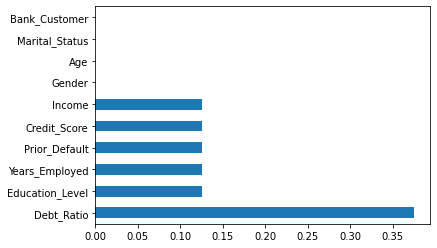

In [90]:
X = np.array(feature_df)
y = np.array(target_df)
model = AdaBoostClassifier(n_estimators=8)
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index = feature_df.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### Regularizing n_estimators - using validation curve

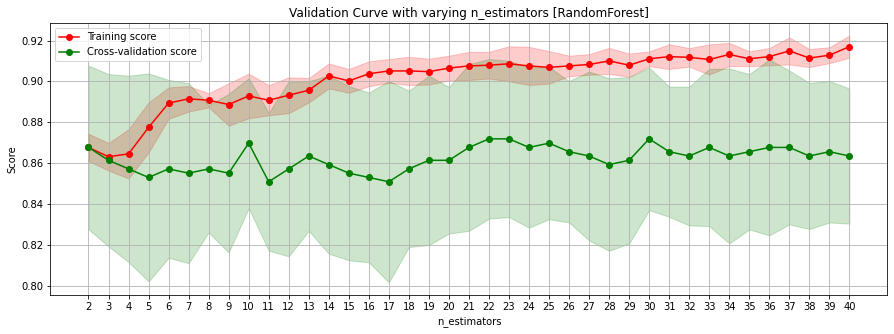

In [91]:
param_range = np.arange(2, 41, 1)
ab_model = AdaBoostClassifier(n_estimators=8)
train_scores, test_scores = validation_curve(ab_model, 
                                             X_train, 
                                             y_train, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=7, 
                                             scoring="accuracy")

title = "Validation Curve with varying n_estimators [RandomForest]"
xlabel = "n_estimators"
plot_validation_curve(param_range, train_scores, test_scores, title, xlabel)

### Regularizing multiple parameter together using GridSearchCV

In [140]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': range(2,40)}

ab_model = AdaBoostClassifier(n_estimators=8)

clf = GridSearchCV(estimator=ab_model, param_grid=parameters, cv=7, scoring='accuracy')
clf.fit(X_train, y_train) 

best_tree_model_ab = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.8718487394957984 {'n_estimators': 22}


### Fitting the Model - Bagging Classifier

In [95]:
from sklearn.ensemble import BaggingClassifier
bg_model = BaggingClassifier(n_estimators=22, max_samples= .7, bootstrap=True)
bg_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.7, n_estimators=22,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

#### Prediction - Random Forest

In [96]:
# predict the outcome for test data
y_predict = bg_model.predict(X_test)

# calculate accuracy score on test data (accuracy for unseen data)
acc = metrics.accuracy_score(y_test,y_predict)
print("\nProduction: Accuracy Score: ", acc)


Production: Accuracy Score:  0.8634146341463415


#### Validation - K Fold

In [97]:
# KFold validation
cv_scores = cross_val_score(bg_model, X_train, y_train, cv=7, scoring='accuracy')
print("KFold CV: Accuracy: %0.04f (+/- %0.4f) [RandomForest-Default]" %(cv_scores.mean()*100, cv_scores.std()*100))

bg_kfold_cv_scores = cv_scores

KFold CV: Accuracy: 86.1345 (+/- 2.3394) [RandomForest-Default]


#### Feature Imporatance

In [100]:
# For above trained model get the feature importance
feature_imp = np.mean([tree.feature_importances_ for tree in bg_model.estimators_], axis=0)
print(feature_imp)

[0.01 0.07 0.11 0.   0.   0.05 0.02 0.05 0.56 0.01 0.02 0.02 0.08]


#### Regularizing n_estimators - using validation curve

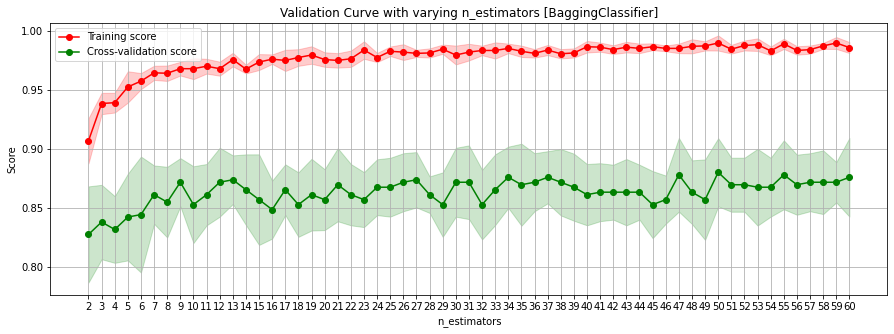

In [110]:
param_range = np.arange(2, 61, 1)
bg_model = BaggingClassifier(n_estimators=22, max_samples= .7, bootstrap=True)
train_scores, test_scores = validation_curve(bg_model, 
                                             X_train, 
                                             y_train, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=7, 
                                             scoring="accuracy")

title = "Validation Curve with varying n_estimators [BaggingClassifier]"
xlabel = "n_estimators"
plot_validation_curve(param_range, train_scores, test_scores, title, xlabel)

#### Observation - Validation Curve - Bagging Classifier(Default)

1. validation curve provide performance for both training and testing data
2. For n_estimators 19 and 28 training performance is optimium with less variance
3. For n_estimators > 40, the tree perfectly predicts all of the train data and accuracy reaches to 1, 
4. It becomes computationally expensive beyond 40

#### Regularizing multiple parameter together using GridSearchCV

In [141]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': range(2,61)}

bg_model = BaggingClassifier(n_estimators=51, max_samples= .7, bootstrap=True)

clf = GridSearchCV(estimator=bg_model, param_grid=parameters, cv=7, scoring='accuracy')
clf.fit(X_train, y_train) 

best_tree_model_bg = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.888655462184874 {'n_estimators': 53}


### Fitting the Model - Gradient Boost Classifier

In [162]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [163]:
# predict the outcome for test data
y_predict = gb_model.predict(X_test)

# calculate accuracy score on test data (accuracy for unseen data)
acc = metrics.accuracy_score(y_test,y_predict)
print("\nProduction: Accuracy Score: ", acc)


Production: Accuracy Score:  0.848780487804878


### Validation - K Fold

In [164]:
# KFold validation
cv_scores = cross_val_score(gb_model, X_train, y_train, cv=7, scoring='accuracy')
print("KFold CV: Accuracy: %0.04f (+/- %0.4f) [GradientBoost-Default]" %(cv_scores.mean()*100, cv_scores.std()*100))

gb_kfold_cv_scores = cv_scores

KFold CV: Accuracy: 86.7647 (+/- 3.0444) [RandomForest-Default]


### Feature Imporatance

In [165]:
# For above trained model get the feature importance
feature_imp = pd.DataFrame(gb_model.feature_importances_, columns = ["Imp"], index = feature_df.columns)
print(feature_imp)

                      Imp
Gender           0.000000
Age              0.024761
Debt_Ratio       0.046907
Marital_Status   0.000000
Bank_Customer    0.000000
Education_Level  0.016773
Ethnicity        0.005304
Years_Employed   0.033029
Prior_Default    0.759839
Experience       0.014936
Credit_Score     0.030092
Citizen          0.009889
Income           0.058469


#### Regularizing n_estimators - using validation curve

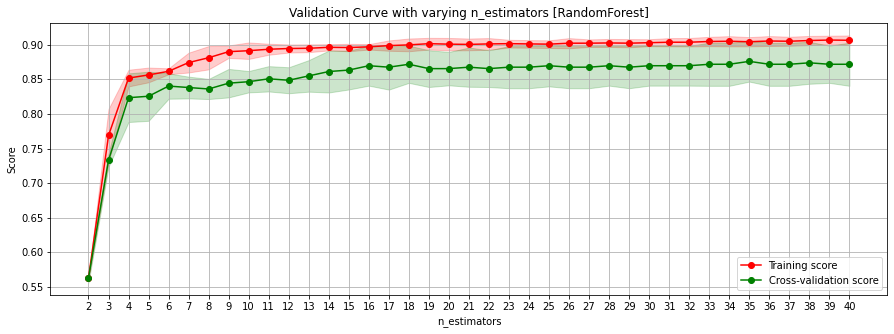

In [168]:
param_range = np.arange(2, 41, 1)
gb_model = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
train_scores, test_scores = validation_curve(gb_model, 
                                             X_train, 
                                             y_train, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=7, 
                                             scoring="accuracy")

title = "Validation Curve with varying n_estimators [RandomForest]"
xlabel = "n_estimators"
plot_validation_curve(param_range, train_scores, test_scores, title, xlabel)

### Regularizing multiple parameter together using GridSearchCV

In [169]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': range(2,41)}

gb_model = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)

clf = GridSearchCV(estimator=gb_model, param_grid=parameters, cv=7, scoring='accuracy')
clf.fit(X_train, y_train) 

best_tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.8739495798319327 {'n_estimators': 35}


### Fitting the Model - XG Boost Classifier

In [177]:
! pip install xgboost

In [178]:
import xgboost
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [179]:
# predict the outcome for test data
y_predict = xgb_model.predict(X_test)

# calculate accuracy score on test data (accuracy for unseen data)
acc = metrics.accuracy_score(y_test,y_predict)
print("\nProduction: Accuracy Score: ", acc)


Production: Accuracy Score:  0.8634146341463415


In [181]:
# KFold validation
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=7, scoring='accuracy')
print("KFold CV: Accuracy: %0.04f (+/- %0.4f) [XGBoost-Default]" %(cv_scores.mean()*100, cv_scores.std()*100))

xgb_kfold_cv_scores = cv_scores

KFold CV: Accuracy: 85.5042 (+/- 3.3744) [XGBoost-Default]


### Feature Imporatance

In [182]:
# For above trained model get the feature importance
feature_imp = pd.DataFrame(xgb_model.feature_importances_, columns = ["Imp"], index = feature_df.columns)
print(feature_imp)

                      Imp
Gender           0.027948
Age              0.017280
Debt_Ratio       0.029685
Marital_Status   0.000000
Bank_Customer    0.000000
Education_Level  0.024398
Ethnicity        0.030485
Years_Employed   0.022464
Prior_Default    0.676393
Experience       0.050963
Credit_Score     0.027994
Citizen          0.035632
Income           0.056757


#### Regularizing n_estimators - using validation curve

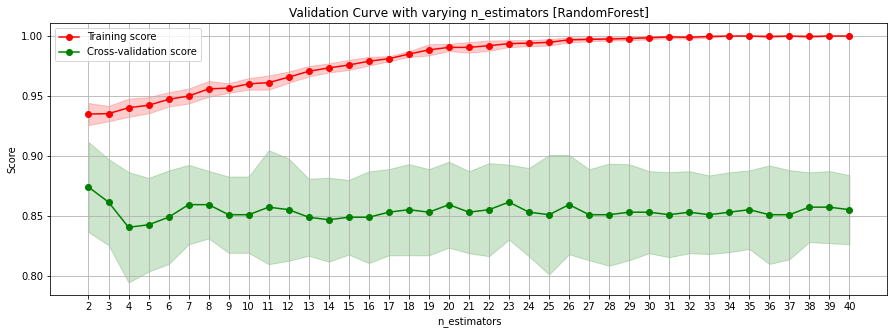

In [183]:
param_range = np.arange(2, 41, 1)
xgb_model = XGBClassifier()
train_scores, test_scores = validation_curve(xgb_model, 
                                             X_train, 
                                             y_train, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=7, 
                                             scoring="accuracy")

title = "Validation Curve with varying n_estimators [RandomForest]"
xlabel = "n_estimators"
plot_validation_curve(param_range, train_scores, test_scores, title, xlabel)

### Regularizing multiple parameter together using GridSearchCV

In [184]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': range(2,41)}

xgb_model = XGBClassifier()

clf = GridSearchCV(estimator=xgb_model, param_grid=parameters, cv=7, scoring='accuracy')
clf.fit(X_train, y_train) 

best_tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.8739495798319327 {'n_estimators': 2}


### Algorithm Performance Comparision Before Applying GridSearchCV

DT: 0.795972 (0.140040)
RF: 0.841603 (0.165096)
AB: 0.839940 (0.186532)
BG: 0.842988 (0.172736)
GB: 0.826790 (0.192206)
XGB: 0.823934 (0.155786)


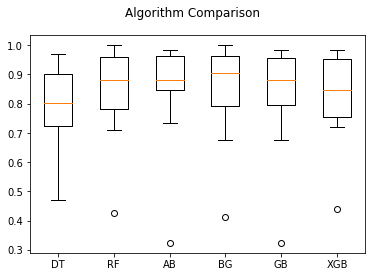

In [185]:
from sklearn import model_selection
models = []
models.append(('DT', dt_model))

models.append(('RF', rf_model))

models.append(('AB', ab_model))

models.append(('BG', bg_model))

models.append(('GB', gb_model))

models.append(('XGB', xgb_model))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=1)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


### Algorithm Performance Comparision After Applying GridSearchCV

RF: 0.882137 (0.000000)
AB: 0.873803 (0.000000)
BG: 0.886436 (0.000000)
GB: 0.880053 (0.000000)
XGB: 0.871676 (0.000000)


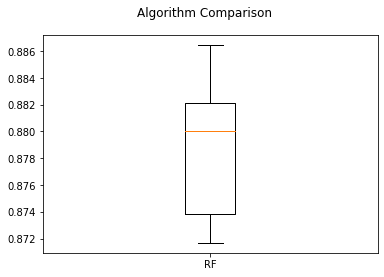

In [191]:
from sklearn import model_selection
models_grid = []
models_grid.append(('RF', rf_model))
models_grid.append(('AB', ab_model))
models_grid.append(('BG', bg_model))
models_grid.append(('GB', gb_model))
models_grid.append(('XGB', xgb_model))

# evaluate each model in turn
results = []
names = []
parameters = {'n_estimators': range(2,61)}
for name, model in models_grid:
    kfold = model_selection.KFold(n_splits=10, random_state=1)
    clf = GridSearchCV(estimator=model, param_grid=parameters, cv=kfold, scoring='accuracy')
    clf.fit(X_train, y_train)
    clf2 = clf.best_score_
    results.append(clf2)
    names.append(name)
    msg = "%s: %f (%f)" % (name, clf2.mean(),clf2.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Conclusion

Bagging Classifier with **88%** has turned out to be a Better performing Algorithm.